In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('digit-recognizer/train.csv')
df.head()
h, w = 28, 28
y = df.iloc[:, 0]
X = df.iloc[:,1:]/255.
n_images = len(X)
print(df.shape)

(42000, 785)


In [2]:
# Reshape images
images = np.reshape(X, newshape=(n_images, h, w))

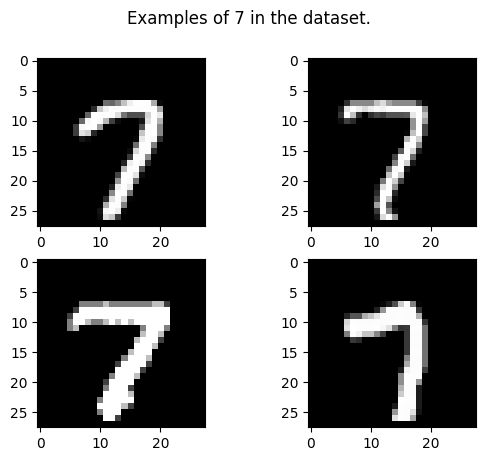

In [3]:
import random

num_to_show = 4
chosen_label = eval(input('Pick a number between 0-9: '))
sample = np.array(random.choices(images[np.where(y == chosen_label)], k=num_to_show))

fig, axs = plt.subplots(2, 2)
fig.suptitle(f"Examples of {chosen_label} in the dataset.", fontsize=12)

axs[0, 0].imshow(sample[0], cmap='gray', vmin=0, vmax=1)
axs[0, 1].imshow(sample[1], cmap='gray', vmin=0, vmax=1)
axs[1, 0].imshow(sample[2], cmap='gray', vmin=0, vmax=1)
axs[1, 1].imshow(sample[3], cmap='gray', vmin=0, vmax=1)

plt.show()



## SKlearn


In [4]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [7]:
from sklearn.svm import SVC

# Learn the digits on the train subset
model = SVC(gamma='scale', class_weight='balanced', C=100)
model.fit(X_train, y_train)

predicted = model.predict(X_test)

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(
    f"Classification report for classifier {model}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=100, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1242
           1       0.99      0.99      0.99      1429
           2       0.98      0.98      0.98      1276
           3       0.98      0.97      0.97      1298
           4       0.98      0.97      0.98      1236
           5       0.98      0.98      0.98      1119
           6       0.98      0.99      0.99      1243
           7       0.98      0.98      0.98      1334
           8       0.97      0.98      0.97      1204
           9       0.97      0.97      0.97      1219

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600




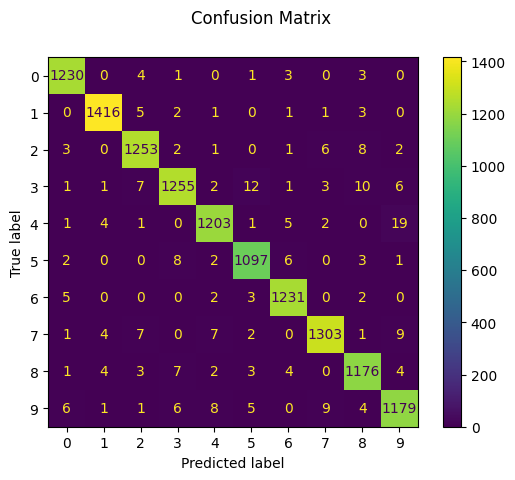

In [10]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()